In [1]:
import sys 
import os

import numpy as np
import matplotlib.pyplot as plt
import timeit

sys.path.insert(0, '../../MATHUSLA_FastSim/')
import DetectorSimulation.Detector as Detector
import DetectorSimulation.llp_gun_new as lg
from Helpers.functions import *

sys.path.insert(0,'../../FastSim_Additions/')
from Additions import initiate_detector
from run_simulation import do_sim
import Event_Data_Structure as eds

sys.path.insert(0, '../MixingAnglePlots/')
from MixingAngle_vs_Yield_Plot import get_ctaus

In [2]:
fv_file = '../../SimulationData/ForMixingPlot/RHN_Ue_LLPweight4vectorBmesonlist_mN_0.316228.csv'
fv_path = os.path.join(os.getcwd(), fv_file)
length_file = '../../SimulationData/RHNctauUe.dat'
len_path = os.path.join(os.getcwd(), length_file)
product_file = '../../SimulationData/vN_to_all_0.314228_new.txt'
prod_path = os.path.join(os.getcwd(), product_file)

In [3]:
mass = float(fv_file.split('_')[-1][:-4])
mixing = 0.004
ctau = get_ctaus(mass = mass, mixing = mixing,length_file = len_path)

In [4]:
detector_benchmark = initiate_detector('../../MATHUSLA_FastSim/param_card_CDR.txt')

In [5]:
start = timeit.default_timer()

vertices = do_sim(fv_path, prod_path, ctau, mass, detector_benchmark, 20000)

end = timeit.default_timer()

print(end - start)

C:\Users\baitk\Documents\5thYear\Phys499\Using_FastSim\DataStorageTests\../../MATHUSLA_FastSim\Helpers\functions.py:184: RuntimeWarning: divide by zero encountered in log
  exp = -b*ctau*np.log(1-unif) # use pdf inversion to get exponential distribution
C:\Users\baitk\anaconda3\envs\spyder\Lib\site-packages\numpy\core\numeric.py:1665: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
C:\Users\baitk\anaconda3\envs\spyder\Lib\site-packages\numpy\core\numeric.py:1666: RuntimeWarning: invalid value encountered in multiply
  tmp = array(a2 * b1)
C:\Users\baitk\anaconda3\envs\spyder\Lib\site-packages\numpy\core\numeric.py:1668: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
C:\Users\baitk\anaconda3\envs\spyder\Lib\site-packages\numpy\core\numeric.py:1669: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b2, out=tmp)
C:\Users\baitk\anaconda3\envs\spyder\Lib\site-packages\numpy\core\numeric.py:1671: RuntimeW

26.304300700023305


In [6]:
start = timeit.default_timer()
data = eds.to_data_structure(vertices)
eds.data_to_pickle(data, 'Conservation_Data.pickle')
end = timeit.default_timer()
print(end - start)

0.7785122999921441


In [7]:
print(data['momentum'].shape)
momentum_before = data['momentum']

(4146, 4)


In [8]:
import awkward as ak

In [9]:
momentum_after = ak.sum(data['daughters'][:,:,:4], axis = 1).to_numpy()

In [21]:
(momentum_before - momentum_after).T.shape

(4, 4146)

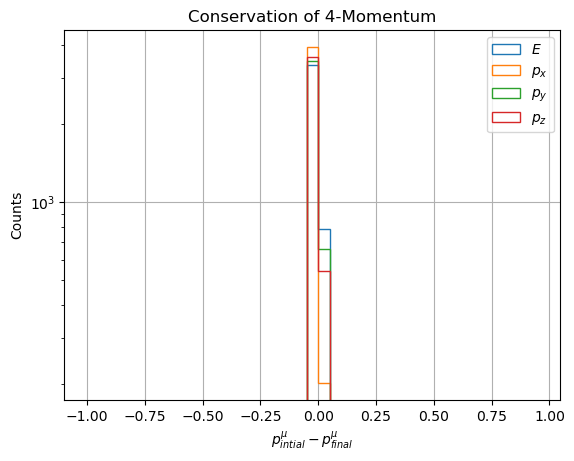

In [24]:
key = [r'$E$', r'$p_x$', r'$p_y$', r'$p_z$']

for i,conservation in enumerate(zip(momentum_before.T, momentum_after.T)):
    difference = conservation[0] - conservation[1]
    bins = np.arange(-1,1, 0.05)
    plt.hist(difference, bins = bins, histtype = 'step', label = key[i])

plt.title('Conservation of 4-Momentum')
plt.xlabel(r'$p^{\mu}_{intial} - p^{\mu}_{final}$')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.grid()

In [12]:
print(momentum_before[np.where(difference == max(difference))])
momentum_after[np.where(difference == max(difference))]

[[ 38.47115204 -13.98715666  24.22730109  26.40694737]]


array([[-13.98715666,   5.36015082,  -8.73663174,  -9.52263621]])

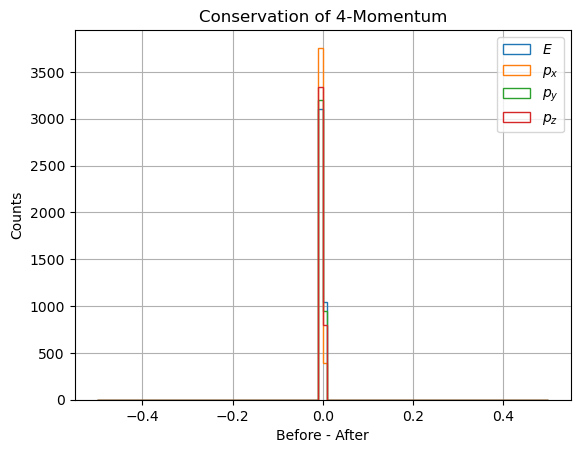

In [17]:
key = [r'$E$', r'$p_x$', r'$p_y$', r'$p_z$']

for i,conservation in enumerate(zip(momentum_before.T, momentum_after.T)):
    difference = conservation[0] - conservation[1]
    bins = np.arange(-0.5,0.50001, 0.01)
    plt.hist(difference, bins = bins, histtype = 'step', label = key[i])

plt.title('Conservation of 4-Momentum')
plt.xlabel('Before - After')
plt.ylabel('Counts')
plt.legend()
plt.grid()